# Australian female lifetables

female 2012

In [1]:
import pandas as pd
lifetable = 'lifetable_female_2012.xlsx'
LIFETABLE = pd.read_excel (lifetable)

# lx
def l(x):
    c = int(LIFETABLE.iloc[x]['l'])
    return c

# dx
def d(x):
    c = int(LIFETABLE.iloc[x]['d'])
    return c

# tPx
def p(x,t = 1):
    c = l(x+t)/l(x)
    return c

# tQx
def q(x, t = 1, s = 0):
    c = (l(x+s)-l(x+t+s))/l(x)
    return c

# Life expectancy (x)
def e(x):
    c = LIFETABLE.iloc[x]['e']
    return float(c)

#UDD Assumption formulae
def UDD_l(x):
    t = float(x) - int(x) 
    c = (1-t)*l(int(x))+t*l(int(x)+1)
    return c

def UDD_p(x,t=1):
    a = UDD_l(x+t)/UDD_l(x)
    return a

def UDD_q(x, t=1, s=0):
    a = (UDD_l(x+t+s)-UDD_l(x+t+s+1))/UDD_l(x)
    #I'm not certain t and s works (i.e. t|s qx) 
    return a

#CFM Assumption formulae
def CFM_l(x):
    t = float(x) - int(x) 
    c = l(int(x))**(1-t)*l(int(x)+1)**t
    return c

def CFM_p(x,t=1):
    a = CFM_l(x+t)/CFM_l(x)
    return a

def CFM_q(x, t=1, s=0):
    #haven't tested this whole formula
    a = (CFM_l(x+t+s)-CFM_l(x+t+s+1))/CFM_l(x)
    return a

LIFETABLE.head()

,x,l,d,q,p,mu,e
0,0,100000.000000,335.200000,0.003352,0.996648,NaN,84.31
1,1,99664.800000,26.809831,0.000269,0.999731,0.000331,83.60
2,2,99637.990169,16.938458,0.000170,0.999830,0.000213,82.62
3,3,99621.051710,10.759074,0.000108,0.999892,0.000131,81.63
4,4,99610.292637,10.558691,0.000106,0.999894,0.000102,80.64


## Test to ensure proper indexing

In [28]:
age = int(input('how old is your friend? '))
print(LIFETABLE.iloc[age]['x'], 'years old')
print(l(age), 'living')
print(d(age), 'will die')
print(q(age), 'q')
print(p(age), 'p')
print(LIFETABLE.iloc[age]['mu'], 'force of death')
print('+',e(age), 'life expectancy')

p(age)

how old is your friend? 20
20.0 years old
99398 living
26 will die
0.0002716352441699028 q
0.99972836475583 p
0.000264 force of death
+ 64.79 life expectancy


0.99972836475583

#### 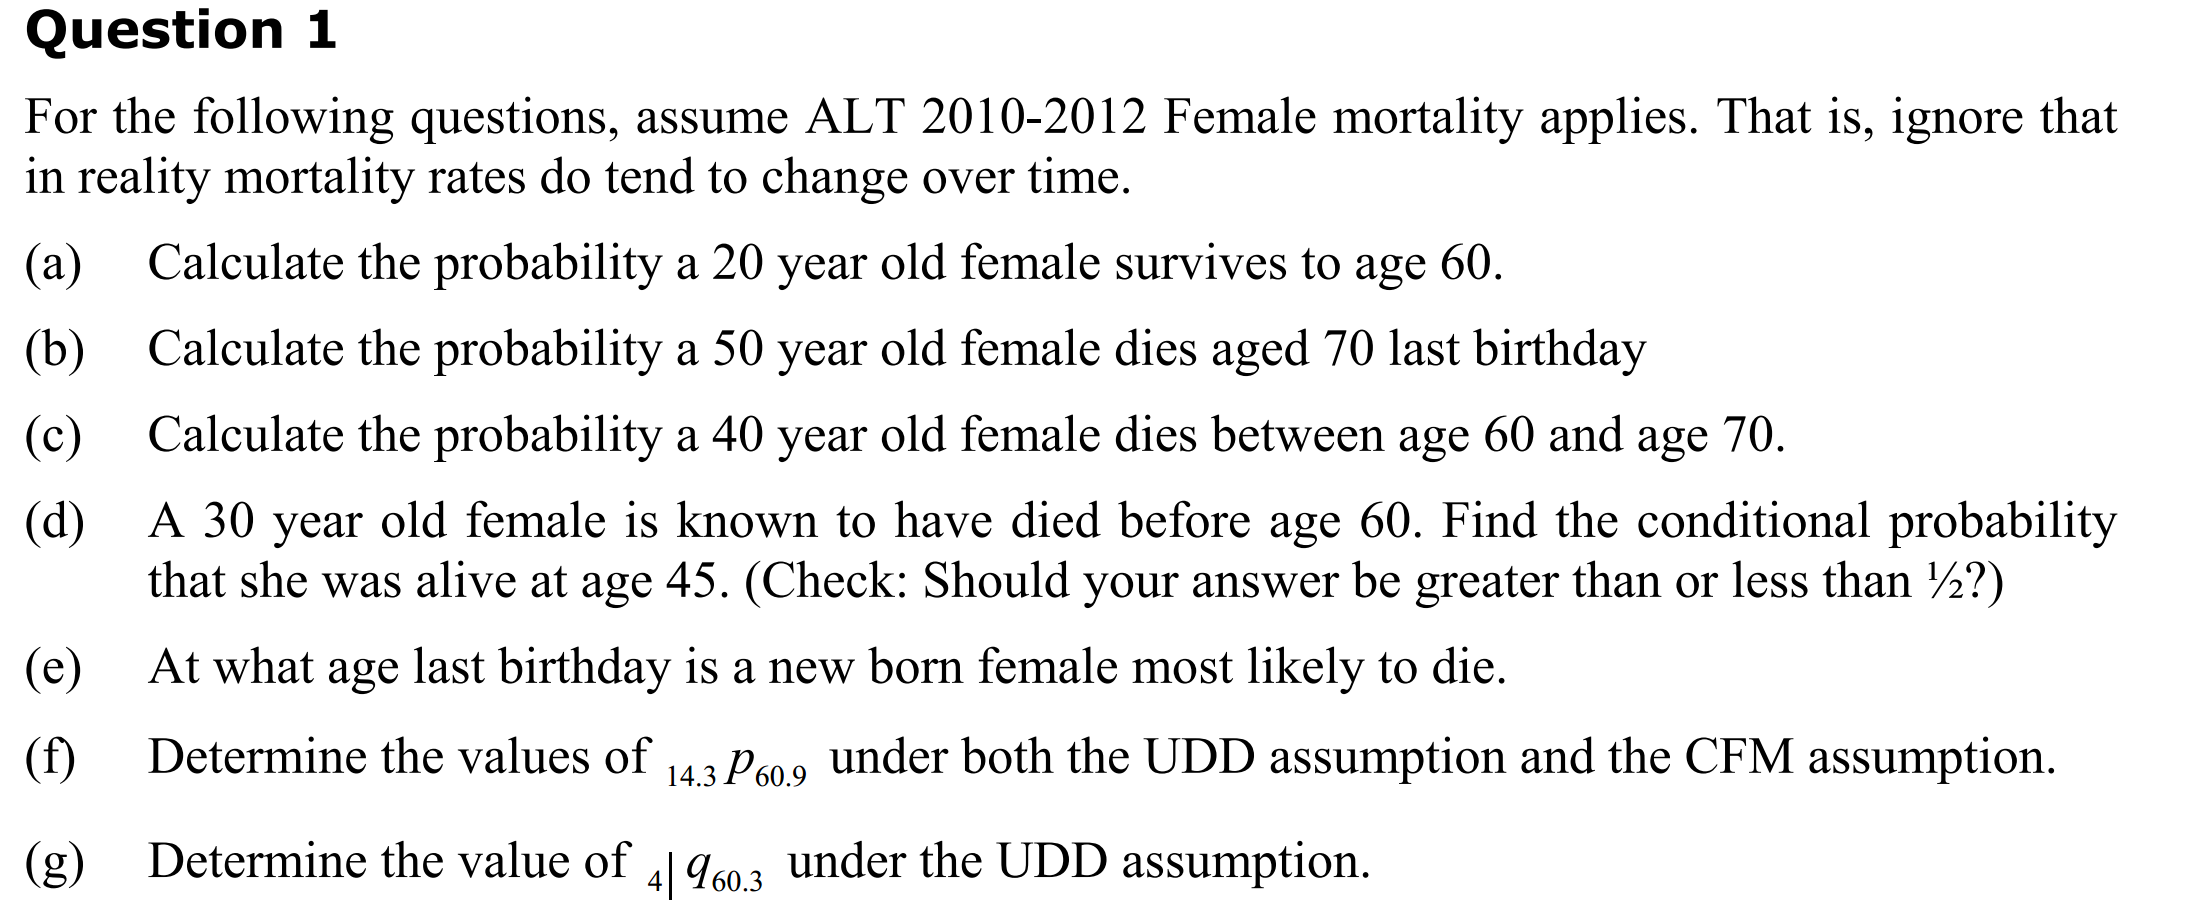


## Defining tPx --> x year old lives t more years

def p(x,t = 1):
    c = l(x+t)/l(x)
    print()
    print(str(t)+'P'+str(x))
    print('  =', 'l',x+t,'/','l',x)
    print('  =',l(x+t),'/',l(x))
    print('  =', c)
    return c

###test
x = int(input('x = '))
t = int(input('t = '))
    
p(x,t)

## Defining tQx --> x year dies within t years

def q(x,t = 1):
    c = (l(x)-l(x+t))/l(x)
    print()
    print(str(t)+'Q'+str(x))
    print(' =','(l',x, '- l',x+t,') /','l',x)
    print(' = (',l_x,'-',l_xt,') /',l_x)
    print(' =',c)
    return c

###test
x = int(input('x = '))
t = int(input('t = '))
q(x,t)

## The probability an x year old survives until age x+t

In [30]:
age = int(input('Age now: '))
death = int(input('Survives until: '))

print(p(age,death - age))

Age now: 20
Survives until: 60
0.9553009114871527


## x yo dies aged y

In [31]:
age = int(input('Age now: '))
death = int(input('Dies aged: '))

p(age, death - age)*q(death, 1)

Age now: 50
Dies aged: 70


0.009428348653972423

## x yo dies survives until y, dies before z

>where t = y-x, s = z-y 

>t|s qx

In [32]:
age = int(input('Age now: '))
death1 = int(input('Survives until: '))
death2 = int(input('Dies before: '))

p(age, death1 - age)*q(death1, death2 - death1)


Age now: 40
Survives until: 60
Dies before: 70


0.05818292435611438

## x yo died before age y. Find probability she was alive at age z

In [33]:
age = int(input('Age def alive: '))
dead = int(input('Age def dead: '))
Q = int(input('Age life under question: '))

# P(alive at Q | dead at dead)
#  = P(A@Q int D@dead) / P(D@dead) 
p(age, Q - age)*q(Q, dead - Q) / q(age, dead - age)

Age def alive: 30
Age def dead: 60
Age life under question: 45


0.7696737044145873

## Define life expectancy female age x

In [28]:
age = int(input('Age:'))
print('expected to live to')
print('formula          ',e(age)+age)

#from first principles
# ex = SUM(lx+1:lw) / lx

#i = 1
#SUM = 0
#while (age+i) in LIFETABLE['x']:
#    SUM += l(age+i)
#    i += 1

SUM = sum(LIFETABLE[age+1:])
print('first principles ',(SUM/l(age))+age)

Age:20
expected to live to
formula           84.79
first principles  84.29010644077346


## tPx under UDD and CFM assumptions

In [19]:
x = float(input('Age now x: '))
t = float(input('Lives t more years: '))

a = UDD_p(x,t)
b = CFM_p(x,t)

print('UDD:',a,'\nCFM:',b)

Age now x: 60.9
Lives t more years: 14.3
UDD: 0.879821925525382 
CFM: 0.8797992044844224


## 4|q60.3 under UDD| assumptions

In [18]:
x = float(input('Age now x: '))
t = float(input('Lives t more years: '))

a = UDD_q(x,t)
b = CFM_q(x,t)

print('UDD:',a,'\nCFM:',b)

Age now x: 60.3
Lives t more years: 4
93065.6 - 92523.5 / 94840.70000000001
UDD: 0.005715900452021186 CFM: 0.00571655144564765
